In [3]:
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json 
from scipy.interpolate import interp1d
import matplotlib

# sns.set_style("darkgrid")
sns.set_style("whitegrid")
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

In [156]:

src = "en"
tgt = "en"
nd_data = pickle.load(open("{}_{}-dep_0.pkl".format(src, tgt), "rb"))
d_data = pickle.load(open("{}_{}-dep_1.pkl".format(src, tgt), "rb"))

In [24]:
def get_points(d1, d2, el, nbins = 30):
    max_len = max(max([d[0] for d in d1]), max([d[0] for d in d2]), max([d[0] for d in el]))
    bin_width = int (max_len / float(nbins) + 0.5)
    bin_markers = [(i * bin_width, (i+1) * bin_width) for i in range(nbins + 1)]
    points_d1 = {bin:(0, 0) for bin in bin_markers}
    for d in d1:
        for bin in bin_markers:
            if d[0] >= bin[0] and d[0] < bin[1]:
                points_d1[bin] = (points_d1[bin][0] + 1, points_d1[bin][1]+d[1])
                break
    points_d2 = {bin:(0, 0) for bin in bin_markers}
    for d in d2:
        for bin in bin_markers:
            if d[0] >= bin[0] and d[0] < bin[1]:
                points_d2[bin] = (points_d2[bin][0] + 1, points_d2[bin][1] + d[1])
                break
    points_el = {bin:(0, 0) for bin in bin_markers}
    for d in el:
        for bin in bin_markers:
            if d[0] >= bin[0] and d[0] < bin[1]:
                points_el[bin] = (points_el[bin][0] + 1, points_el[bin][1] + d[1])
                break
    return points_d1, points_d2, points_el

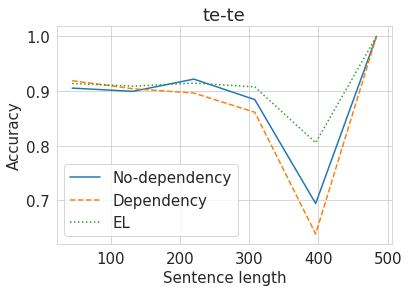

In [26]:
pred_dir = f'../predictions_IndoRE/'

for src in ["hi","en","te"]:
    for tgt in ["hi","en","te"]:
        # if src != tgt:
        #     continue
        
        nd_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_0-el_0-gnn-depth_5.pkl", "rb"))
        d2_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_2.pkl", "rb"))
        # d3_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_3.pkl", "rb"))
        # d5_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_5.pkl", "rb"))
        el_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_0-el_1-gnn-depth_5.pkl", "rb"))
        
        
        # d_data = pickle.load(open("{}_{}-dep_1.pkl".format(src, tgt), "rb"))
        nd = [(nd_data[k]["sent_len"], int(nd_data[k]["pred_rel"] == nd_data[k]["true_rel"])) for k in nd_data.keys() if "pred_rel" in nd_data[k]]
        d2 = [(d2_data[k]["sent_len"], int(d2_data[k]["pred_rel"] == d2_data[k]["true_rel"])) for k in d2_data.keys() if "pred_rel" in nd_data[k]]
        el = [(el_data[k]["sent_len"], int(el_data[k]["pred_rel"] == el_data[k]["true_rel"])) for k in el_data.keys() if "pred_rel" in nd_data[k]]
        
        
        points_d1, points_d2, points_el = get_points(nd, d2,el, nbins = 5)
        plt.clf()
        plt.cla()
        plt.close()

        x = [(x[0] + x[1]) / 2.0 for x in points_d1.keys() if points_d1[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_d1.values() if x[0] > 0 ]

        # 300 represents number of points to make between T.min and T.max
        # xnew = np.linspace(min(x), max(x), num=50, endpoint=True)

        # # Define interpolators.
        # f_cubic = interp1d(x, y, kind='cubic')

        sns.lineplot(x=x, y=y, linestyle='-', label="No-dependency")

        x = [(x[0] + x[1]) / 2.0 for x in points_d2.keys() if points_d2[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_d2.values() if x[0] > 0 ]

        # 300 represents number of points to make between T.min and T.max
        # xnew = np.linspace(min(x), max(x), num=50, endpoint=True)

        # # Define interpolators.
        # f_cubic = interp1d(x, y, kind='cubic')

        sns.lineplot(x=x, y=y, linestyle='--', label="Dependency")

        x = [(x[0] + x[1]) / 2.0 for x in points_el.keys() if points_el[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_el.values() if x[0] > 0 ]

        sns.lineplot(x=x, y=y, linestyle=':', label="EL")

        # sns.lineplot(x=[(x[0] + x[1]) / 2.0 for x in points_d2.keys() if points_d2[x][0] > 0], y=[x[1]/float(x[0]) for x in points_d2.values() if x[0] > 0 ], label="Dependency")
        plt.legend()
        plt.title("{}-{}".format(src, tgt))
        plt.xlabel("Sentence length")
        plt.ylabel("Accuracy")
        plt.savefig("../figures/{}_{}-dep_error_analysis.png".format(src, tgt), dpi = 120)
        


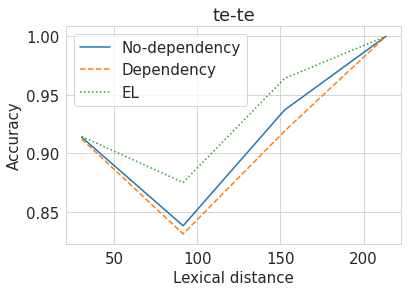

In [29]:
pred_dir = f'../predictions_IndoRE/'

for src in ["hi","en","te"]:
    for tgt in ["hi","en","te"]:
        # if src != tgt:
        #     continue
        
        nd_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_0-el_0-gnn-depth_5.pkl", "rb"))
        d2_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_2.pkl", "rb"))
        # d3_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_3.pkl", "rb"))
        # d5_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_5.pkl", "rb"))
        el_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_0-el_1-gnn-depth_5.pkl", "rb"))
        
        
        # d_data = pickle.load(open("{}_{}-dep_1.pkl".format(src, tgt), "rb"))
        nd = [(nd_data[k]["lex_dist"], int(nd_data[k]["pred_rel"] == nd_data[k]["true_rel"])) for k in nd_data.keys() if "pred_rel" in nd_data[k]]
        d2 = [(d2_data[k]["lex_dist"], int(d2_data[k]["pred_rel"] == d2_data[k]["true_rel"])) for k in d2_data.keys() if "pred_rel" in nd_data[k]]
        el = [(el_data[k]["lex_dist"], int(el_data[k]["pred_rel"] == el_data[k]["true_rel"])) for k in el_data.keys() if "pred_rel" in nd_data[k]]
        
        
        points_d1, points_d2, points_el = get_points(nd, d2,el, nbins = 3)
        plt.clf()
        plt.cla()
        plt.close()

        x = [(x[0] + x[1]) / 2.0 for x in points_d1.keys() if points_d1[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_d1.values() if x[0] > 0 ]

        # 300 represents number of points to make between T.min and T.max
        # xnew = np.linspace(min(x), max(x), num=50, endpoint=True)

        # # Define interpolators.
        # f_cubic = interp1d(x, y, kind='cubic')

        sns.lineplot(x=x, y=y, linestyle='-', label="No-dependency")

        x = [(x[0] + x[1]) / 2.0 for x in points_d2.keys() if points_d2[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_d2.values() if x[0] > 0 ]

        # 300 represents number of points to make between T.min and T.max
        # xnew = np.linspace(min(x), max(x), num=50, endpoint=True)

        # # Define interpolators.
        # f_cubic = interp1d(x, y, kind='cubic')

        sns.lineplot(x=x, y=y, linestyle='--', label="Dependency")

        x = [(x[0] + x[1]) / 2.0 for x in points_el.keys() if points_el[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_el.values() if x[0] > 0 ]

        sns.lineplot(x=x, y=y, linestyle=':', label="EL")

        # sns.lineplot(x=[(x[0] + x[1]) / 2.0 for x in points_d2.keys() if points_d2[x][0] > 0], y=[x[1]/float(x[0]) for x in points_d2.values() if x[0] > 0 ], label="Dependency")
        plt.legend()
        plt.title("{}-{}".format(src, tgt))
        plt.xlabel("Lexical distance")
        plt.ylabel("Accuracy")
        plt.savefig("../figures/{}_{}-dep_error_lex_analysis.png".format(src, tgt), dpi = 120)
        


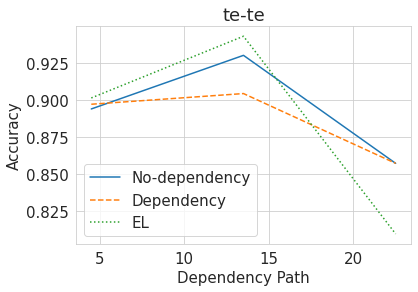

In [32]:
pred_dir = f'../predictions_IndoRE/'

for src in ["hi","en","te"]:
    for tgt in ["hi","en","te"]:
        # if src != tgt:
        #     continue
        
        nd_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_0-el_0-gnn-depth_5.pkl", "rb"))
        d2_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_2.pkl", "rb"))
        # d3_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_3.pkl", "rb"))
        # d5_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_1-el_0-gnn-depth_5.pkl", "rb"))
        el_data = pickle.load(open(f"{pred_dir}/{src}_{tgt}-dep_0-el_1-gnn-depth_5.pkl", "rb"))
        
        
        # d_data = pickle.load(open("{}_{}-dep_1.pkl".format(src, tgt), "rb"))
        nd = [(nd_data[k]["dep_path"], int(nd_data[k]["pred_rel"] == nd_data[k]["true_rel"])) for k in nd_data.keys() if "pred_rel" in nd_data[k]]
        d2 = [(d2_data[k]["dep_path"], int(d2_data[k]["pred_rel"] == d2_data[k]["true_rel"])) for k in d2_data.keys() if "pred_rel" in nd_data[k]]
        el = [(el_data[k]["dep_path"], int(el_data[k]["pred_rel"] == el_data[k]["true_rel"])) for k in el_data.keys() if "pred_rel" in nd_data[k]]
        
        
        points_d1, points_d2, points_el = get_points(nd, d2,el, nbins = 3)
        plt.clf()
        plt.cla()
        plt.close()

        x = [(x[0] + x[1]) / 2.0 for x in points_d1.keys() if points_d1[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_d1.values() if x[0] > 0 ]

        # 300 represents number of points to make between T.min and T.max
        # xnew = np.linspace(min(x), max(x), num=50, endpoint=True)

        # # Define interpolators.
        # f_cubic = interp1d(x, y, kind='cubic')

        sns.lineplot(x=x, y=y, linestyle='-', label="No-dependency")

        x = [(x[0] + x[1]) / 2.0 for x in points_d2.keys() if points_d2[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_d2.values() if x[0] > 0 ]

        # 300 represents number of points to make between T.min and T.max
        # xnew = np.linspace(min(x), max(x), num=50, endpoint=True)

        # # Define interpolators.
        # f_cubic = interp1d(x, y, kind='cubic')

        sns.lineplot(x=x, y=y, linestyle='--', label="Dependency")

        x = [(x[0] + x[1]) / 2.0 for x in points_el.keys() if points_el[x][0] > 0]
        y = [x[1]/float(x[0]) for x in points_el.values() if x[0] > 0 ]

        sns.lineplot(x=x, y=y, linestyle=':', label="EL")

        # sns.lineplot(x=[(x[0] + x[1]) / 2.0 for x in points_d2.keys() if points_d2[x][0] > 0], y=[x[1]/float(x[0]) for x in points_d2.values() if x[0] > 0 ], label="Dependency")
        plt.legend()
        plt.title("{}-{}".format(src, tgt))
        plt.xlabel("Dependency Path")
        plt.ylabel("Accuracy")
        plt.savefig("../figures/{}_{}-dep_path.png".format(src, tgt), dpi = 120)
        


In [92]:
plt.clf()
plt.cla()
plt.close()

In [108]:
from sklearn.metrics import f1_score

In [160]:
def get_points(d1, d2, quarts = 3, method = "bin"):
    sorted_d1 = sorted(d1, key=lambda x: x[0])
    sorted_d2 = sorted(d2, key=lambda x: x[0])
    assert len(sorted_d1) == len(sorted_d2)
    assert [x[0] for x in sorted_d1] == [x[0] for x in sorted_d2]

    if method == "segment":

        acc_diffs = []
        f1s_diff = []
        for i in range(0, len(sorted_d1), int(np.ceil(len(sorted_d1)/quarts))):
            d1_data = sorted_d1[i: i+int(np.ceil(len(sorted_d1)/quarts))]
            d2_data = sorted_d2[i: i+int(np.ceil(len(sorted_d1)/quarts))]
            f1_d1 = f1_score([x[2] for x in d1_data], [x[1] for x in d1_data], average="macro")
            f1_d2 = f1_score([x[2] for x in d2_data], [x[1] for x in d2_data], average="macro")
            acc_d1 = sum([x[1] == x[2] for x in d1_data]) / float(len(d1_data))
            acc_d2 = sum([x[1] == x[2] for x in d2_data]) / float(len(d2_data))
            acc_diffs.append(acc_d2 - acc_d1)
            f1s_diff.append(f1_d2 - f1_d1)
        return f1s_diff, acc_diffs
    else:
        quart_bins = int((max([x[0] for x in sorted_d1]) -  0)/float(quarts) + 1)

        quart_markers = [(i * quart_bins, (i+1) * quart_bins) for i in range(quarts)]
        results_d1 = {bin:[] for bin in quart_markers}
        results_d2 = {bin:[] for bin in quart_markers}
        acc_diffs = []
        f1s_diff = []
        for i in range(0, len(sorted_d1)):
            for quart in quart_markers:
                if sorted_d1[i][0] >= quart[0] and sorted_d1[i][0] < quart[1]:
                    results_d1[quart].append((sorted_d1[i][1], sorted_d1[i][2]))
                    break
        for i in range(0, len(sorted_d2)):
            flag = False
            for quart in quart_markers:
                if sorted_d2[i][0] >= quart[0] and sorted_d2[i][0] < quart[1]:
                    results_d2[quart].append((sorted_d2[i][1], sorted_d2[i][2]))
                    flag = True
                    break
            if not flag:
                raise Exception("Error")
        for quart in quart_markers:
            f1_d1 = f1_score([x[1] for x in results_d1[quart]], [x[0] for x in results_d1[quart]], average="macro")
            f1_d2 = f1_score([x[1] for x in results_d2[quart]], [x[0] for x in results_d2[quart]], average="macro")
            acc_d1 = sum([x[1] == x[0] for x in results_d1[quart]]) / float(len(results_d1[quart]))
            acc_d2 = sum([x[1] == x[0] for x in results_d2[quart]]) / float(len(results_d2[quart]))
            acc_diffs.append(acc_d2 - acc_d1)
            f1s_diff.append(f1_d2 - f1_d1)
        return f1s_diff, acc_diffs
    # lens = [x[0] for x in sorted_d1]
    

In [189]:
triples = []
for src in ["en", "te", "hi"]:
    for tgt in ["en", "te", "hi"]:
        if src == tgt:
            continue
        nd_data = pickle.load(open("{}_{}-dep_0.pkl".format(src, tgt), "rb"))
        d_data = pickle.load(open("{}_{}-dep_1.pkl".format(src, tgt), "rb"))
        nd = [(nd_data[k]["lex_dist"], nd_data[k]["pred_rel"], nd_data[k]["true_rel"]) for k in nd_data.keys() if "pred_rel" in nd_data[k]]
        d = [(d_data[k]["lex_dist"], d_data[k]["pred_rel"], d_data[k]["true_rel"]) for k in d_data.keys() if "pred_rel" in nd_data[k]]
        print("{}-{}".format(src, tgt), f1_score([x[2] for x in nd], [x[1] for x in nd], average="macro"), f1_score([x[2] for x in d], [x[1] for x in d], average="macro"))
        triples.append((f"{src}-{tgt}", get_points(nd, d, quarts = 3, method="segment")[0]))

en-te 0.43128933143051507 0.436882514807032
en-hi 0.6480813385504764 0.6611960954562864
te-en 0.49013601753586394 0.4828417264089287
te-hi 0.5654035989030587 0.5933413474444524
hi-en 0.65677531463547 0.6903362508269515
hi-te 0.5256154019313904 0.5941207670314792


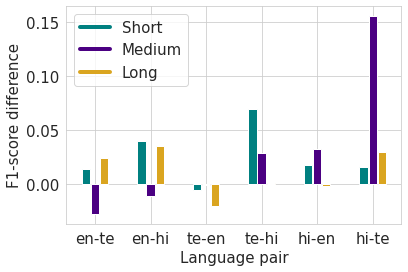

In [190]:
xs = []
for id, (code, t) in enumerate(triples):
    plt.bar([(2*(id )) - 0.66], [t[0]], width = 0.3, color = "teal", label = "Short")
    plt.bar([(2*(id )) - 0.33], [t[1]], width = 0.3, color = "indigo", label = "Medium")
    plt.bar([(2*(id )) ], [t[2]], width = 0.3, color = "goldenrod", label = "Long")
    xs.append((2*(id )) - 0.33)

plt.xticks(xs, [x[0] for x in triples])

# put indigo, orange, green as short, medium, long labels in legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="teal", lw=4),
                Line2D([0], [0], color="indigo", lw=4),#]
                Line2D([0], [0], color="goldenrod", lw=4)]


plt.legend(custom_lines, ['Short', "Medium", 'Long'])
# plt.title("F1-score difference between dependency and no-dependency")
plt.xlabel("Language pair")
plt.ylabel("F1-score difference")
plt.savefig("f1_score_diff_sent.png", dpi = 120,bbox_inches='tight')

(0.0, 5.0)

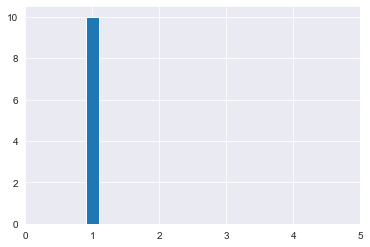

In [88]:
plt.bar([1], [10] , width = 0.2)
plt.xlim(0, 5)

In [133]:
from collections import Counter 

In [134]:
Counter(sorted([x[0] for x in d]))

Counter({0: 73,
         1: 44,
         2: 28,
         3: 36,
         4: 33,
         5: 26,
         6: 29,
         7: 17,
         8: 15,
         9: 15,
         10: 24,
         11: 13,
         12: 16,
         13: 20,
         14: 13,
         15: 12,
         16: 13,
         17: 12,
         18: 8,
         19: 7,
         20: 8,
         21: 13,
         22: 7,
         23: 8,
         24: 10,
         25: 12,
         26: 6,
         27: 6,
         28: 5,
         29: 8,
         30: 5,
         31: 8,
         32: 5,
         33: 4,
         34: 5,
         35: 4,
         36: 4,
         37: 4,
         38: 8,
         39: 3,
         40: 6,
         41: 4,
         42: 3,
         43: 4,
         44: 5,
         45: 3,
         46: 4,
         47: 2,
         48: 1,
         49: 3,
         50: 4,
         51: 3,
         52: 3,
         53: 4,
         54: 2,
         55: 8,
         56: 3,
         57: 1,
         58: 2,
         59: 1,
         60: 2,
         61: 

In [3]:
data = json.load(open("english_indore_el_paths.json", "r"))

In [7]:
1 - (len([x for x in data if x["paths"] == []])/ len(data))

0.9190431298609474

In [8]:
data = json.load(open("telugu_indore_el_paths.json", "r"))

In [9]:
1 - (len([x for x in data if x["paths"] == []])/ len(data))

0.774589158695119

In [10]:
data = json.load(open("hindi_indore_el_paths.json", "r"))

In [11]:
1 - (len([x for x in data if x["paths"] == []])/ len(data))

0.8448944420508402